#### Imports

In [1]:
# import cartopy.crs as ccrs
# import cartopy.feature as cfeature
# import matplotlib.pyplot as plt
# import netCDF4 as nc
# import numpy as np
# import os
# import pandas as pd
# import xarray as xr
# import glob
# from cartopy.io.shapereader import Reader
# from matplotlib.projections.polar import PolarAxes
# from scipy.interpolate import interp1d
# from scipy.integrate import quad
# from scipy.stats import linregress, weibull_min
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from windrose import WindroseAxes
# Custom libraries
from data_loading import load_datasets, load_csv_files
import plotting
import netcdf_exploration
import data_analysis

Cannot find header.dxf (GDAL_DATA is not defined)


#### Paths

In [2]:
# Base paths for different categories
measurements_path = 'data/measurements/'
turbine_info_path = 'data/turbine-info/coordinates/'
turbine_power_curves_path = 'data/turbine-info/power_curves/'
shapefiles_path = 'data/shapefiles/'
era5_path = 'data/reanalysis/'

# Buyoy NetCDF files
bouy6_path = f'{measurements_path}2023-11-06_Buoy6_BSH_N-9.nc'
bouy2_path = f'{measurements_path}2023-11-09_Buoy2_BSH_N-9.nc'
# Layouts base paths
turbines_existing_path = f'{turbine_info_path}existing/'
turbines_planned_future_path = f'{turbine_info_path}planned_future/'
turbines_planned_in_operation_before_2030_path = f'{turbine_info_path}planned_in_operation_before_2030/'
turbines_planned_netherlands_path = f'{turbine_info_path}planned_netherlands/'
turbines_area_of_interest_path = f'{turbine_info_path}area_of_interest/'
# Shapefiles paths
shapefiles_DEU_path = f'{shapefiles_path}DEU/DEU_adm1.shp'
shapefiles_DNK_path = f'{shapefiles_path}DNK/gadm36_DNK_1.shp'
shapefiles_NLD_path = f'{shapefiles_path}NLD/gadm36_NLD_1.shp'
shapefiles_FEP2024_PreDraft = f'{shapefiles_path}FEP2024_PreDraft/*.shp'

# Wind field layout files
file_N9_1 = f'{turbines_area_of_interest_path}layout-N-9.1.geom.csv'
file_N9_2 = f'{turbines_area_of_interest_path}layout-N-9.2.geom.csv'
file_N9_3 = f'{turbines_area_of_interest_path}layout-N-9.3.geom.csv'

#### Data Loading

In [3]:
# Load NetCDF datasets
xrbuoy6, xrbuoy2, buoy2_file, buoy6_file = load_datasets(bouy6_path, bouy2_path)

# Load CSV data
data_N9_1, data_N9_2, data_N9_3 = load_csv_files(file_N9_1, file_N9_2, file_N9_3)

#### 1. Set the Turbine Design: 
- International Energy Agency (IEA) for a 15 MW offshore wind turbine
- Turbine name: IEA-15MW-D240-H150
-rotor diameter:  240 meters
- hub height: 150 meters

With that we say the height of interest is the one, nearest on the hub height: 140 m 


#### 2. Plot the field of interest together with the lidar measurement buoy positions


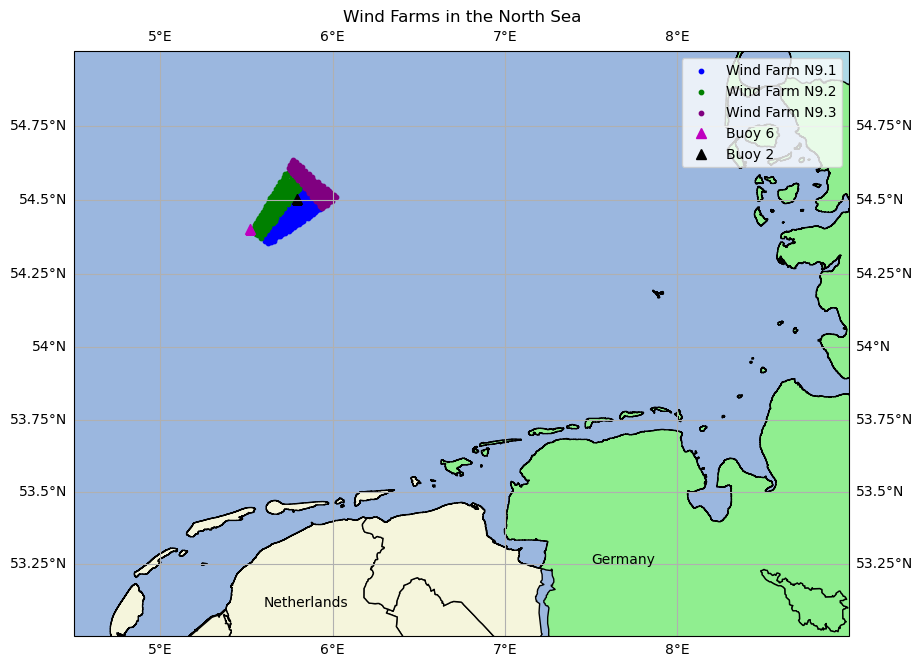

In [4]:
plotting.plot_wind_farms_and_buoys(shapefiles_path, data_N9_1, data_N9_2, data_N9_3)

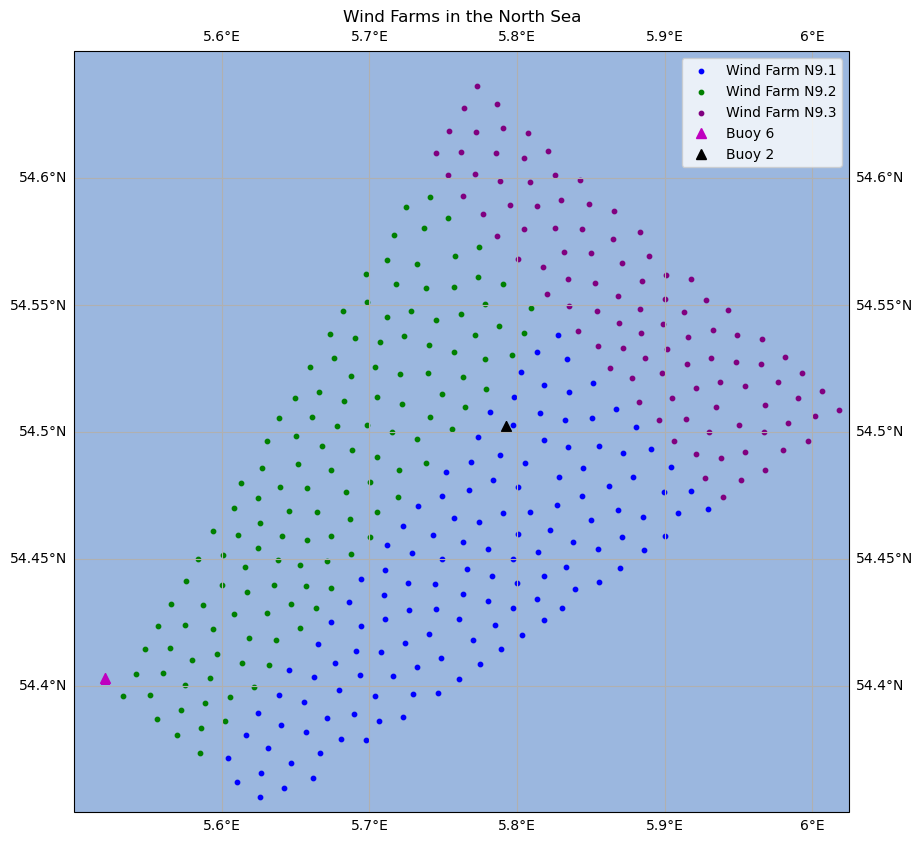

In [5]:
plotting.plot_wind_farms_and_buoys_zoomed(data_N9_1, data_N9_2, data_N9_3)

#### 3. Explore the structure and variables inside the  2 ncfiles

In [ ]:
#Define a few functions to explore the structure and variables inside the ncfiles 
def overwiev_ncfile(current_ncfile):
    
    # Print all the head groups first with enumeration
    for group_count, group_name in enumerate(current_ncfile.groups):
        group = current_ncfile.groups[group_name]
        print(f"TopGroup Nr. {group_count + 1}: {group_name}")
    print(f"---------------------------------------------------------")
    print(f"---------------------------------------------------------")

    # Iterate over all the groups
    for group_name in current_ncfile.groups:
        group = current_ncfile.groups[group_name]
        print(f"TopGroup: {group_name}")

        for variable_group in group.variables: #over all variables
            group_variable = group.variables[variable_group]
            print(f"    Groupvariable: {variable_group}")
        
        for subgroup_name in group.groups: #subgroups
            subgroup = group.groups[subgroup_name]
            print(f"        Subgroup: {subgroup_name}")
                
            for variable_name in subgroup.variables: #variables in a subgroup 
                variable = subgroup.variables[variable_name]
                print(f"            SubGroupVariable: {variable_name}")
    print(f"---------------------------------------------------------")
    print(f"---------------------------------------------------------")

def explore_topgroup_variables(current_ncfile, topgroup_name):

    for variable_name in current_ncfile.groups[topgroup_name].variables:
        variable = current_ncfile.groups[topgroup_name].variables[variable_name]
        print(f"Variable Name: {variable_name}")
        print(f"Variable Attributes:")
        print(f"    Units: {variable.units}")
        print(f"    Long Name: {variable.long_name}")
        print(f"    Shape: {variable.shape}")
        print(f"---------------------------------------------------------")

def explore_sub_groups(current_ncfile, top_group_name):
    top_group_name = current_ncfile.groups[top_group_name] 

    for subgroup_name in top_group_name.groups:
        subgroup = top_group_name.groups[subgroup_name]
        print(f"SUBGROUP: {subgroup_name}")
    
         # Iterate over the variables in the subgroup and print their attributes
        for variable_name in subgroup.variables:
            variable = subgroup.variables[variable_name]
            print(f"Variable Name: {variable_name}")
            print(f"Variable Attributes:")
            print(f"    Units: {variable.units}")
            print(f"    Long Name: {variable.long_name}")
            print(f"    Shape: {variable.shape}")
            print(f"---------------------------------------------------------")